# Obesity Analysis Project

**Authors:** Nneka Asuzu & Ruchira Malhotra  
**Dataset:** [UCI ML Repository – Estimation of Obesity Levels](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)

---

## Project Overview

Obesity is a complex public health issue shaped by lifestyle habits, environment, and demographics.  
This project uses **data visualization** to explore patterns in daily behaviors and personal attributes linked to different obesity levels.

Our goal is to transform the dataset into a clear story — revealing how lifestyle choices align with weight categories, **without implying causation**.

---

## Research Question

> **What relationships exist between lifestyle habits, demographic factors, and obesity levels, and how can effective data visualization help uncover meaningful patterns for public health understanding?**

Insights aim to help **health professionals, educators, and policymakers** recognize behavioral patterns that could inform awareness or intervention.

---

## Motivation

Obesity contributes significantly to chronic disease risk and rising healthcare costs.  
Understanding how habits such as eating frequency, calorie awareness, and physical activity relate to obesity can guide **preventive health strategies**.  

Through visualization, this project seeks to:
- Make obesity data interpretable for non-technical audiences  
- Identify habits most strongly associated with obesity  
- Support **data-driven awareness** and **public health education**

---


## Dataset Summary

**Source:** UCI Machine Learning Repository  
**Observations:** 2,111  
**Features:** 17 (lifestyle, diet, physical, and demographic attributes)  
**Target:** `NObeyesdad` — 7-level categorical obesity variable  
**Composition:** ~23% real survey data, ~77% synthetic data (balanced via SMOTE)  
*Note: results reflect dataset patterns, not population prevalence.*

---

##  Limitations & Risks

**Synthetic data bias:** Relationships may be exaggerated or less realistic.  
- **Limited cultural scope:** Data represents individuals from Mexico, Peru, and Colombia.  
- **Self-reported responses:** Eating and activity habits are subject to recall bias.  
- **Association, not causation:** Visualized patterns are correlational.

--- 

##  Ethical & Visualization Principles

- Dataset is **synthetic and anonymized**; no personally identifiable data are included.  
- Visuals are designed with **neutral language** and **colorblind-accessible palettes**.  
- Documentation ensures **transparency, fairness, and reproducibility**.  
- Focus remains on **patterns and education**, not judgment or labeling.


---

##  Data Story Preview

Our visual analysis reveals that obesity risk in this cohort is defined by a critical hierarchy of factors: Primary Demographics (Weight), Primary Behavioral Risk (FAVC and SCC), and Secondary/Mitigating Factors (FAF and MTRANS). We find that the problem is not a lack of general healthy habits (like high vegetable or meal frequency), but rather a failure to manage the core risks of High-Calorie Food Consumption (FAVC) and lack of Calorie Monitoring (SCC). This narrative shifts the public health focus from general health advice to targeted interventions on the most influential daily decisions.


---

## Notebook Outline

| Section | Description |
|----------|--------------|
| **1. Setup & Imports** | Load libraries and define visualization settings |
| **2. Load & Inspect Data** | Explore structure, types, and missing values |
| **3. Data Cleaning** | Handle inconsistencies and prepare for analysis |
| **4. Exploratory Data Analysis (EDA)** | Visualize numeric and categorical features |
| **5. Feature Relationships** | Examine links between habits and obesity |
| **6. Data Storytelling** | Interpret and summarize visual insights |
| **7. Save Visuals** | Export final plots for the report |

---

**Tools:** Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn  
*Next: import libraries and load the dataset.*


# Step 1: Setup & Imports
 -------------------------------

In [ ]:
# Import core libraries for data manipulation and visualization

import pandas as pd         # Data handling and analysis
import numpy as np          # Numerical operations
import matplotlib.pyplot as plt   # Static visualization
import seaborn as sns             # Statistical and aesthetic visualization
from scipy.stats import chi2_contingency  # Chi-Square test to assess relationships between categorical variables

# Visualization Theme & Display Configuration
# --------------------------------------------
# Apply a clean, accessible style for consistency and readability
sns.set_theme(style="whitegrid", palette="Set2")   # Colorblind-friendly palette
plt.rcParams['figure.dpi'] = 120                   # Sharper, high-resolution visuals

# Configure pandas display options for easier data inspection
pd.set_option('display.max_columns', None)

# Reproducibility Setup
# ----------------------
# Set a universal random seed to ensure consistent results in any stochastic process.
# While this EDA is deterministic (no random sampling or model training involved),
# setting a seed now establishes a reproducible foundation for future work.
np.random.seed(103)

"""
📘 Reproducibility Note:
Although the exploratory data analysis (EDA) process here is fully deterministic,
a random seed (`np.random.seed(103)`) is still defined. This is considered a best practice 
for any data science workflow, as it guarantees reproducibility in later stages, 
such as data sampling, model training, or randomized visualization effects.
"""


'\n📘 Reproducibility Note:\nAlthough the exploratory data analysis (EDA) process here is fully deterministic,\na random seed (`np.random.seed(103)`) is still defined. This is considered a best practice \nfor any data science workflow, as it guarantees reproducibility in later stages, \nsuch as data sampling, model training, or randomized visualization effects.\n'

# Step 2: Data Quality Assessment
 -------------------------------
*Ensuring data integrity before analysis*

Before searching for insights, we first confirm that our dataset is reliable, consistent, and free of hidden errors. This assessment ensures that subsequent visualizations and findings are meaningful and trustworthy.

**Diagnosis**
- Checked for missing values using `df.info()` — result: **0 missing values**
- Detected **24 duplicate entries** across all features

**Preliminary Actions**
- Noted duplicates for removal in the cleaning step
- Verified categorical and numeric columns for consistency and proper types

In [2]:
# Define path to the dataset 
csv_path = "../data/raw/ObesityDataSet_raw.csv.csv"

# Load CSV into a pandas DataFrame
data_csv = pd.read_csv(csv_path)

# Display dataset metadata and structure
print("Columns in dataset:", data_csv.columns.tolist())
print("\n Dataset Overview:")
data_csv.info()

# Preview the first few rows
data_csv.head()


Columns in dataset: ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']

 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOK

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

## Step 2a: Feature Overview (Quick Reference)
*Some column names in the dataset are abbreviated or coded.*

This quick-reference table decodes them, providing **clear descriptions** and **visual cues** to support intuitive understanding before EDA.

<table>
  <tr>
    <th>Feature</th>
    <th>Description</th>
    <th>Possible Values / Scale</th>
  </tr>
  <tr>
    <td><b>FAVC</b></td>
    <td>Frequent consumption of high-calorie food</td>
    <td>✅ Yes / ❌ No</td>
  </tr>
  <tr>
    <td><b>FCVC</b></td>
    <td>Frequency of vegetable consumption</td>
    <td>1 = Never ❌, 2 = Sometimes ⚠️, 3 = Always ✅</td>
  </tr>
  <tr>
    <td><b>NCP</b></td>
    <td>Number of main meals per day</td>
    <td>1–2 🍽, 3 🍽🍽🍽, &gt;3 🍽🍽🍽🍽</td>
  </tr>
  <tr>
    <td><b>CAEC</b></td>
    <td>Snacking between meals</td>
    <td>No ❌, Sometimes ⚠️, Frequently 🔄, Always ✅</td>
  </tr>
  <tr>
    <td><b>SMOKE</b></td>
    <td>Smoking status</td>
    <td>✅ Yes / ❌ No</td>
  </tr>
  <tr>
    <td><b>CH2O</b></td>
    <td>Daily water intake (liters)</td>
    <td>&lt;1 💧, 1–2 💧💧, &gt;2 💧💧💧</td>
  </tr>
  <tr>
    <td><b>SCC</b></td>
    <td>Monitoring calorie consumption</td>
    <td>✅ Yes / ❌ No</td>
  </tr>
  <tr>
    <td><b>FAF</b></td>
    <td>Physical activity frequency (days/week)</td>
    <td>None ❌, 1–2 ⚠️, 2–4 🔄, 4–5 ✅</td>
  </tr>
  <tr>
    <td><b>TUE</b></td>
    <td>Technology usage time (hours/day)</td>
    <td>0 = 0–2 ⏱, 1 = 3–5 ⏱⏱, 2 = &gt;5 ⏱⏱⏱</td>
  </tr>
  <tr>
    <td><b>CALC</b></td>
    <td>Alcohol consumption frequency</td>
    <td>None ❌, Sometimes ⚠️, Frequently 🔄, Always ✅</td>
  </tr>
  <tr>
    <td><b>MTRANS</b></td>
    <td>Primary mode of transportation</td>
    <td>🚗 Automobile, 🏍 Motorbike, 🚲 Bike, 🚌 Public Transport, 🚶 Walking</td>
  </tr>
  <tr>
    <td><b>NObeyesdad</b></td>
    <td>Obesity level category (target)</td>
    <td>Insufficient, Normal, Overweight I/II, Obesity I/II/III</td>
  </tr>
</table>

---

**Notes:**  
- Icons provide a **quick visual cue** for interpreting each response.  
- Features such as FCVC, NCP, FAF, and TUE are categorical variables recorded on numeric scales representing frequency or intensity.
- Other lifestyle features (e.g., CAEC, CALC) are categorical with text labels.
- Binary features (like SMOKE, SCC, FAVC) are Yes/No indicators.
- This table acts as a shared **data dictionary**, helping team members or readers quickly map coded survey responses to real-world meanings.
---

***Target Variable: NObeyesdad (Obesity Level)***

The **`NObeyesdad`** column represents each individual’s **obesity level category**, derived from **Body Mass Index (BMI)** according to **World Health Organization (WHO)** and **Mexican Normativity** standards.  
This variable serves as the **target label** for future predictive modeling tasks.

| Obesity Class           | Description           | BMI Range (kg/m²) |
| ----------------------- | --------------------- | ----------------- |
| **Insufficient Weight** | Underweight           | < 18.5            |
| **Normal Weight**       | Healthy weight        | 18.5 – 24.9       |
| **Overweight Level I**  | Slightly overweight   | 25 – 26.9         |
| **Overweight Level II** | Moderately overweight | 27 – 29.9         |
| **Obesity Type I**      | Mild obesity          | 30 – 34.9         |
| **Obesity Type II**     | Moderate obesity      | 35 – 39.9         |
| **Obesity Type III**    | Severe obesity        | ≥ 40              |

---

**Source & Context**
Mendoza-Palechor, F., & de la Hoz Manotas, A. (2019).  
*Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru, and Mexico.*  
_Data in Brief, 25_, 104344. [DOI link](https://doi.org/10.1016/j.dib.2019.104344)

> **Note:** Approximately **77% of the dataset** was synthetically generated using the **SMOTE (Synthetic Minority Oversampling Technique)** to balance obesity class representation, while **23%** comes from real survey responses.  
> This means patterns and distributions may appear more uniform than in purely real-world data, a crucial factor to consider when interpreting results.

## Step 2b: Data Quality Rationale:  Pre-Cleaning Visualizations Skipped

A visualization on uncleaned data was intentionally **skipped** for three main reasons:

1. **Redundancy:** The dataset was already very clean, only about **1.1 %** of rows were duplicates. Pre- and post-cleaning plots would look almost identical.
2. **Efficiency:** All necessary data-quality checks (e.g., `.info()`, `.duplicated()`) reliably identified missing or repeated values, making diagnostic plots unnecessary.
3. **Narrative Integrity:** The story we present should rest on **trustworthy data**. By showing only post-cleaning visuals, our analysis stays clear, credible, and focused on insights rather than raw noise.

In short, skipping uncleaned plots keeps our narrative efficient, reproducible, and transparent, reflecting a professional data science workflow.

## Step 2c: Inspect Duplicate Rows
  *Before cleaning the dataset, we inspected for duplicate rows to ensure data quality.*
  
* Result: 24 duplicates were found (≈ 1.1 % of total records).
* Duplicates likely stem from repeated survey submissions during data collection

In [3]:
# Count duplicate rows (excluding first occurrences)
num_duplicates_only = data_csv.duplicated().sum()
print(f"Duplicate rows (excluding first occurrences): {num_duplicates_only}")

# View all duplicates including originals
duplicate_rows_all = data_csv[data_csv.duplicated(keep=False)].sort_values(by=list(data_csv.columns))

if not duplicate_rows_all.empty:
    print("\nDuplicate rows (including originals):")
    print (duplicate_rows_all)

Duplicate rows (excluding first occurrences): 24

Duplicate rows (including originals):
     Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
295  Female  16.0    1.66    58.0                             no   no   2.0   
309  Female  16.0    1.66    58.0                             no   no   2.0   
282  Female  18.0    1.62    55.0                            yes  yes   2.0   
460  Female  18.0    1.62    55.0                            yes  yes   2.0   
97   Female  21.0    1.52    42.0                             no   no   3.0   
98   Female  21.0    1.52    42.0                             no   no   3.0   
523  Female  21.0    1.52    42.0                             no  yes   3.0   
527  Female  21.0    1.52    42.0                             no  yes   3.0   
659  Female  21.0    1.52    42.0                             no  yes   3.0   
663  Female  21.0    1.52    42.0                             no  yes   3.0   
208  Female  22.0    1.69    65.0          

## Step 2d: Missing-Value Check
We confirmed whether any null or empty entries existed.
* Result: No missing values detected across all 17 columns.
* This strengthens confidence in the dataset’s consistency.

In [4]:
# Check for missing values before cleaning
print("\nMissing values by column (before cleaning):")
display (data_csv.isnull().sum())


Missing values by column (before cleaning):


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## Step 2e: Descriptive Statistics for Numeric Features
Understanding numeric feature distributions helps guide cleaning and later visualization.

In [5]:
# Descriptive statistics for numeric features
print("\nDescriptive statistics for numeric features:")
display (data_csv.describe())


Descriptive statistics for numeric features:


Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

###  Descriptive Statistics (Key Observations):

**Purpose:** Understand distributions, identify potential anomalies, and guide data cleaning.

**Numeric Features:**

1. **Age**  
   - Range: 14–61 years, mean ~24.3, median ~22.8  
   - Dataset skewed toward younger participants (14–30 years)  
   - No missing values

2. **Height (m)**  
   - Range: 1.45–1.98, mean ~1.70  
   - Low variability (std ~0.093)  
   - Minimum of 1.45 m is unusually short; may represent young teens or check data entry

3. **Weight (kg)**  
   - Range: 39–173, mean ~86.6, median 83  
   - High standard deviation (~26.2) indicates possible outliers in higher weight range
   -  Some extreme values (e.g., 173) may be potential outliers.

4. **FCVC (Vegetable Intake Frequency, 1–3 scale)**  
   - Mean ~2.42, median ~2.38  
   - Most participants eat vegetables “sometimes” to “always”  
   - Values within expected range

5. **NCP (Number of Main Meals, 1–4 scale)**  
   - Mean ~2.69, median 3  
   - Majority have around 3 meals per day; some have more than 3

6. **CH2O (Daily Water Intake, 1–3 scale)**  
   - Mean ~2.01, median 2  
   - Most drink 1–2 liters per day

7. **FAF (Physical Activity Frequency, 0–3 scale)**  
   - Mean ~1.01, median 1  
   - Many participants have low to moderate activity; 25th percentile near 0 indicates some do almost no activity

8. **TUE (Time Using Technology, 0–2 scale)**  
- Mean ~0.66, median ~0.63  
- Most spend less than 3 hours/day; maximum indicates some >5 hours/day  
- Most participants spend 0–2 hours/day using technology (coded 0), while some spend 3–5 hours/day (coded 1) or more than 5 hours/day (coded 2)  

**Visual mapping of codes:**  
- 0 = 0–2 hours/day  
- 1 = 3–5 hours/day ⌚  
- 2 = More than 5 hours/day ⌚⌚


**Summary / Potential Anomalies:**  
- Skew toward younger participants  
- Weight shows high variability and potential outliers  
- Physical activity is low for many participants  
- No missing values in numeric features

### **Outcome**
The dataset is ready for thorough cleaning and preprocessing in **Step 3**, which will remove duplicates, standardize formats, and prepare the data for accurate exploration and visualization.

## Step 3: Data Cleaning and Preparation
 -------------------------------
 *Even though the dataset is nearly pristine, we perform systematic cleaning for reproducibility and professional rigor*

* Having assessed the data quality in Step 2, we now perform the necessary cleaning and preprocessing to ensure that all subsequent analyses are reliable and reproducible.

### 3a. Standardize Categorical Columns
*Ensures consistency across all text fields.*
* Stripped extra spaces and unified capitalization for consistency across all categorical features
*  Ensures labels are comparable and visualizations are clear

In [6]:
# Define categorical features
categorical_features = [
    'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
    'SMOKE', 'SCC', 'CALC', 'MTRANS'
]

# Standardize categorical text
# Remove extra spaces and fix inconsistent capitalization
for col in categorical_features + ['NObeyesdad', 'FAVC', 'SMOKE', 'SCC']:
    data_csv[col] = data_csv[col].astype(str).str.strip().str.capitalize()

print("Categorical columns standardized.\n")

Categorical columns standardized.



### 3b: Ensure Numeric Columns Are Correct
* Converted numeric columns to proper numeric types
* Checked for any unexpected non-numeric entries
* Ensures calculations and visualizations are accurate
* Result: No non-numeric entries were found, confirming type integrity.

In [7]:
# Define numeric features

numeric_features = [
    'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'
]

# Convert numeric columns
for col in numeric_features:
    data_csv[col] = pd.to_numeric(data_csv[col], errors='coerce')  # Convert invalid to NaN

# Check datatypes
print("Numeric column data types:")
print(data_csv[numeric_features].dtypes)

# Optional: check for newly introduced NaNs
print("\nMissing values in numeric columns after type conversion:")
print(data_csv[numeric_features].isnull().sum())

Numeric column data types:
Age       float64
Height    float64
Weight    float64
FCVC      float64
NCP       float64
CH2O      float64
FAF       float64
TUE       float64
dtype: object

Missing values in numeric columns after type conversion:
Age       0
Height    0
Weight    0
FCVC      0
NCP       0
CH2O      0
FAF       0
TUE       0
dtype: int64


### 3c: Handle Missing Values (Safeguard)
* Dataset contained no missing values, but any missing entries would be dropped or imputed
* Guarantees robust, reproducible analysis
* Result: No rows dropped; dataset remains complete.

In [8]:
#  Handle missing values if any (optional safeguard) 
# (Dataset likely has none, but it's best practice to handle gracefully)
data_csv = data_csv.dropna().reset_index(drop=True)
print("\nMissing values handled (if any were present).")


Missing values handled (if any were present).


### 3d: Remove Duplicate Rows
* Removed **24 duplicate entries**, retaining **2,087 unique records**
*  Ensures statistical validity and prevents bias in visualizations
*  Result: After cleaning, we retained 2,087 unique records, confirming a fully deduplicated dataset.

In [9]:
# Remove duplicates
initial_rows = data_csv.shape[0]
data_csv = data_csv.drop_duplicates().reset_index(drop=True)
final_rows = data_csv.shape[0]

print(f"\nRemoved {initial_rows - final_rows} duplicate rows (if any).")

# Verify duplicates and missing values
print("\nMissing values after cleaning:")
print (data_csv.isnull().sum())

print("\nNumber of duplicate rows after cleaning:", data_csv.duplicated().sum())


Removed 24 duplicate rows (if any).

Missing values after cleaning:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Number of duplicate rows after cleaning: 0


### 3e: Save the Cleaned Dataset
*  Created `data_clean` as a working copy for post-cleaning analysis
*  Saved to `../data/processed/ObesityDataSet_cleaned.csv` for reproducibility

In [10]:
data_clean = data_csv.copy()   # Create cleaned dataset copy
data_clean.to_csv("../data/processed/ObesityDataSet_cleaned.csv", index=False)   # Save cleaned dataset to CSV
print("Cleaned dataset saved for post-cleaning visualizations.")

Cleaned dataset saved for post-cleaning visualizations.


### 3f: Ready for Discovery

Our dataset now reflects accurate, consistent, and reproducible data from 2,087 individuals across Colombia, Peru, and Mexico.
Every record has been validated, no missing values, no duplicates, and harmonized categorical fields.
With this foundation, we can now visualize meaningful lifestyle patterns and uncover how daily habits relate to obesity levels.

# Step 4: Exploratory Data Analysis (EDA)
 -------------------------------

Purpose: Understand distributions, relationships, and key drivers of obesity levels.

## Step 4a : Chapter 1: The Main Character (NObeyesdad)

*Graph 1: Distribution of Obesity Levels*

C:\Users\User\AppData\Local\Temp\ipykernel_5764\2547809223.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


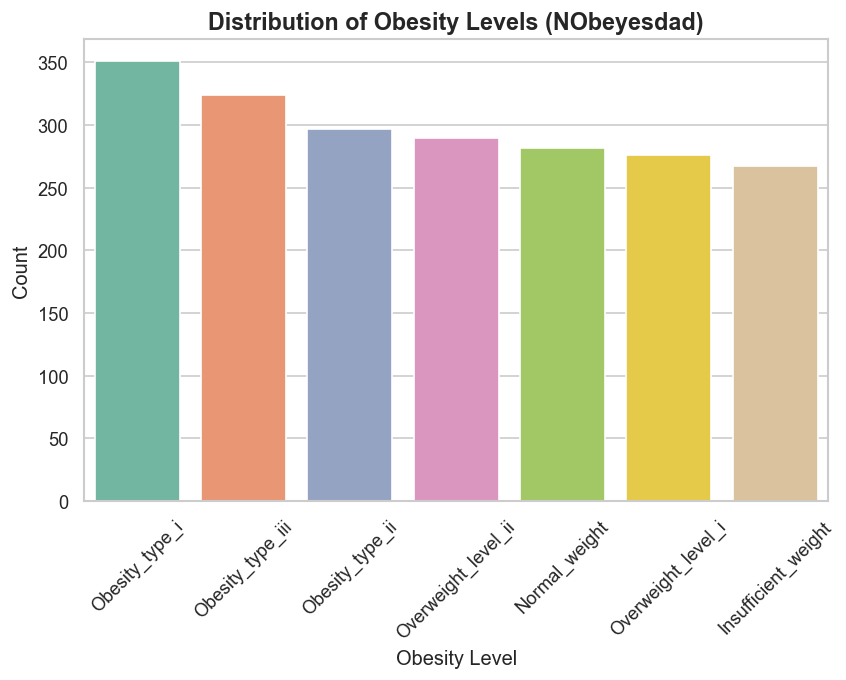

In [11]:
# Plot: Count plot for target variable NObeyesdad
plt.figure(figsize=(8,5))  # Set figure size
sns.countplot(
    x='NObeyesdad',                # Target variable
    data=data_clean,               # Use cleaned dataset
    order=data_clean['NObeyesdad'].value_counts().index,  # Order by frequency
    palette='Set2'                 # Accessible color palette
)
plt.title("Distribution of Obesity Levels (NObeyesdad)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Obesity Level")

# Save figure to visuals folder
plt.savefig("../visuals/graph1_nobeyesdad_distribution.png", bbox_inches='tight')
plt.show()


## Step 4b:  Chapter 2: The Context (Demographics)
*Graph 2: Distribution of Numeric Features*

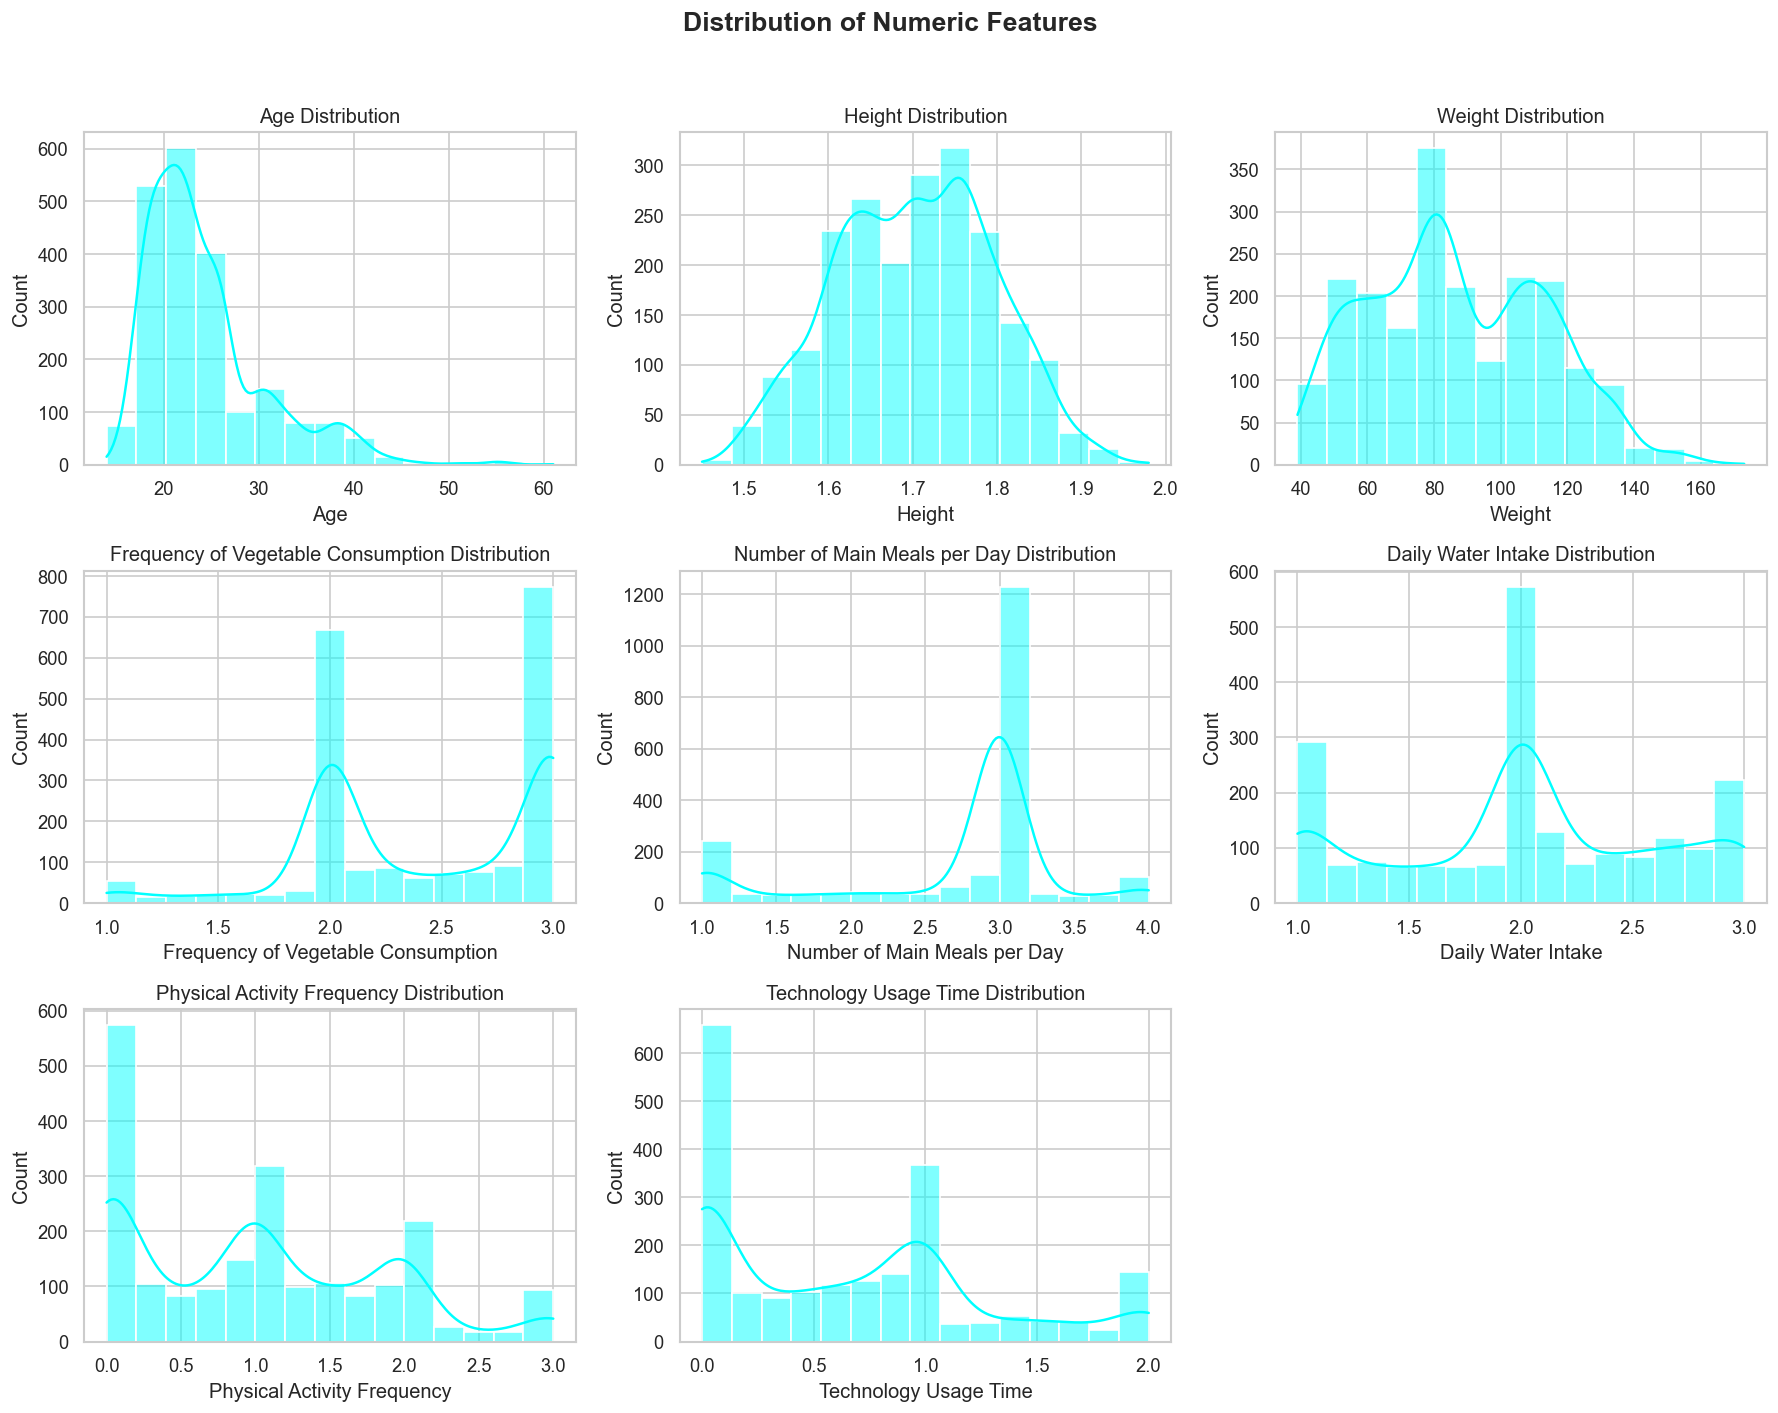

In [12]:
# List of numeric features
numeric_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# --- Dictionary for Descriptive Numeric Titles ---
# This maps the acronyms/short names to their clear, descriptive names.
numeric_feature_name_map = {
    'FCVC': 'Frequency of Vegetable Consumption',
    'NCP': 'Number of Main Meals per Day',
    'CH2O': 'Daily Water Intake',
    'FAF': 'Physical Activity Frequency',
    'TUE': 'Technology Usage Time'
}

# Create a grid of subplots (3 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Loop through each numeric feature to plot histogram
for i, feature in enumerate(numeric_features):
    # Get the descriptive name for the title. 
    # If the feature is not in the map (e.g., 'Age'), it uses the original name.
    descriptive_name = numeric_feature_name_map.get(feature, feature)
    
    sns.histplot(
        data_clean[feature],  # Data for the feature
        bins=15,              # Number of histogram bins
        kde=True,             # Overlay kernel density estimate
        ax=axes[i],           # Plot on corresponding subplot
        color='Cyan'          # Histogram color
    )
    # Set the title using the descriptive name
    axes[i].set_title(f'{descriptive_name} Distribution', fontsize=12)
    # Set the X-label using the descriptive name
    axes[i].set_xlabel(descriptive_name)
    axes[i].set_ylabel('Count')

# Remove any empty subplots if features < total axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Add a main title for the figure
plt.suptitle('Distribution of Numeric Features', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save figure
# plt.savefig("../visuals/graph2_numeric_features_distribution.png", bbox_inches='tight')

# Show the plot
plt.show()

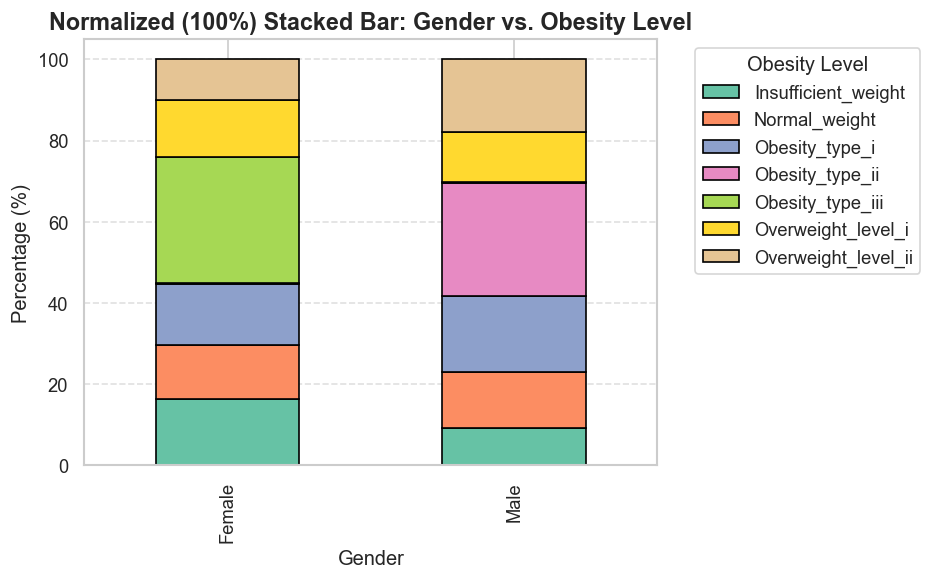

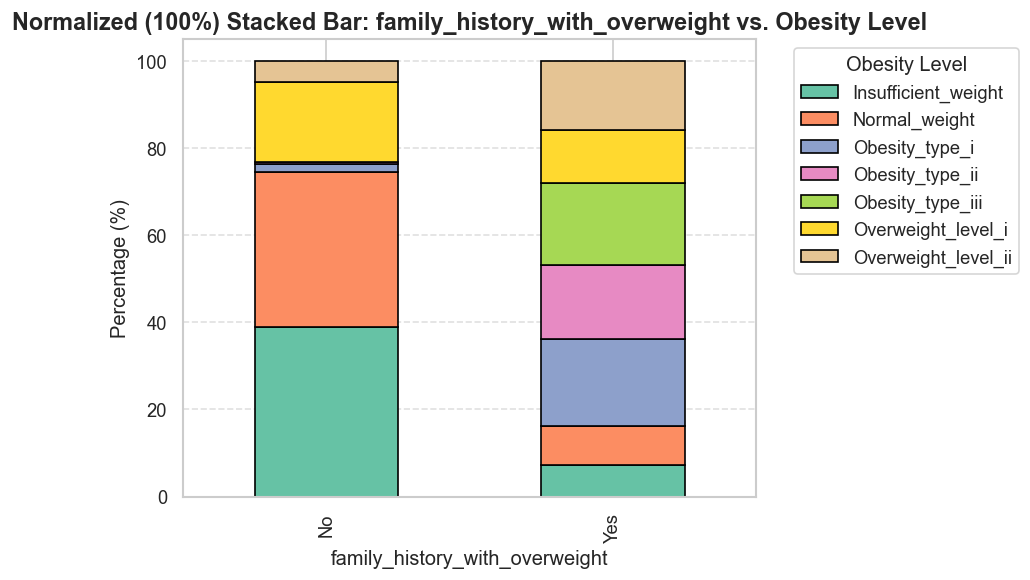

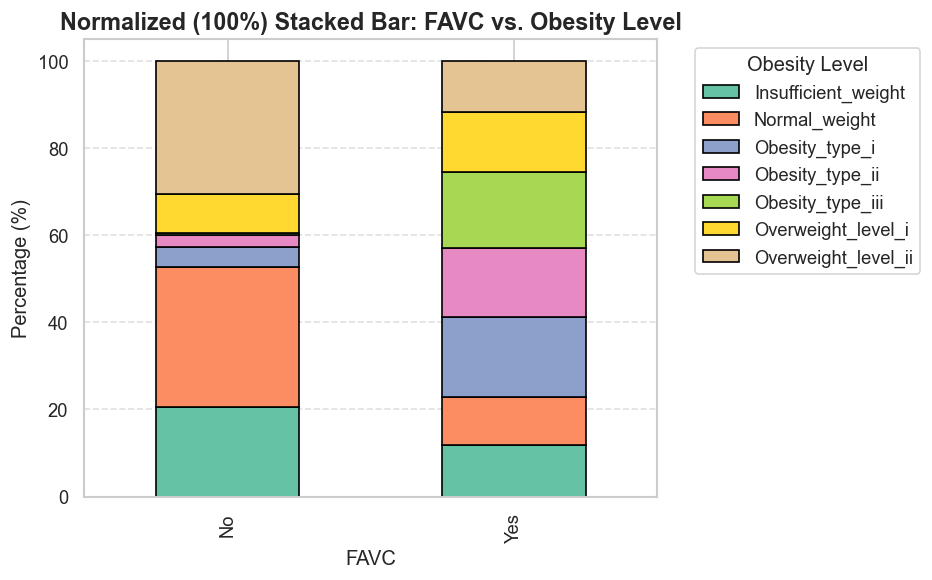

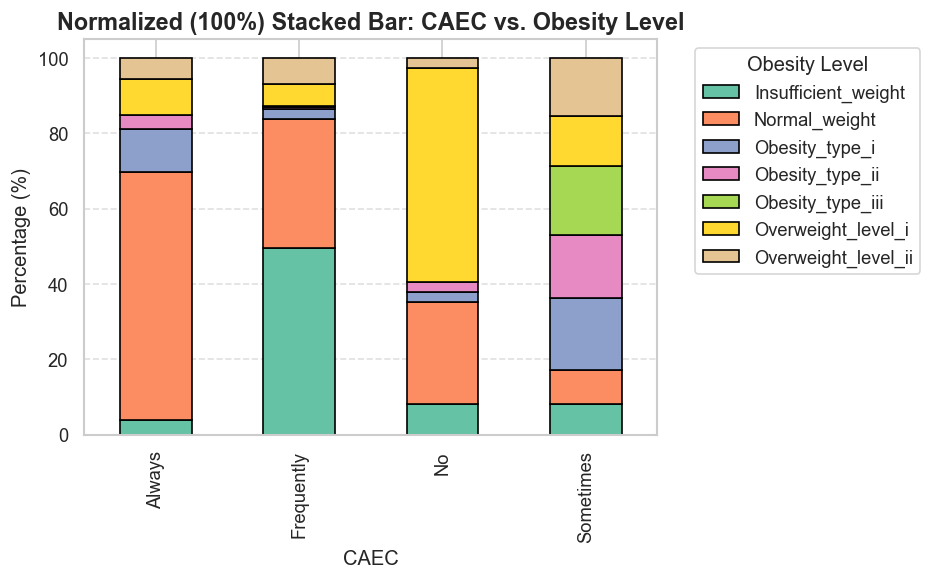

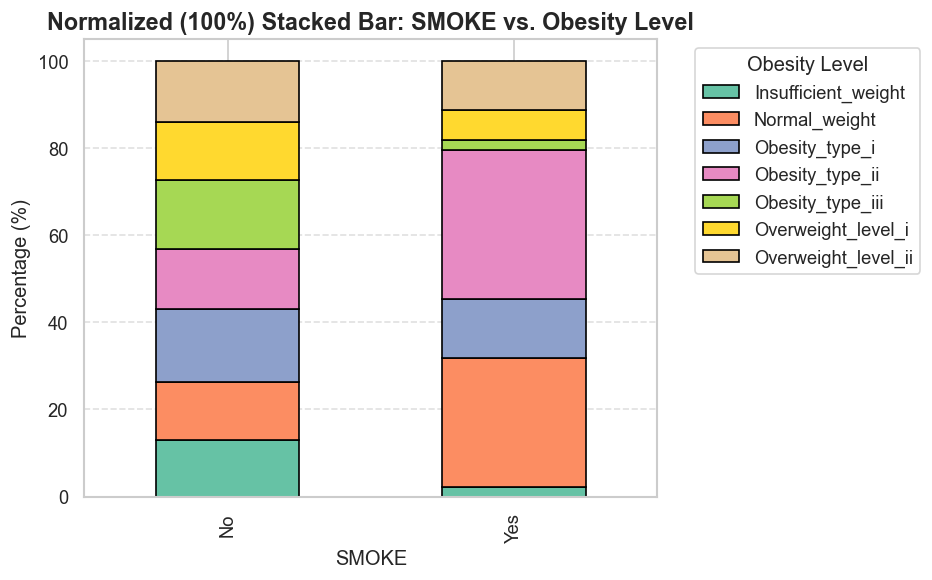

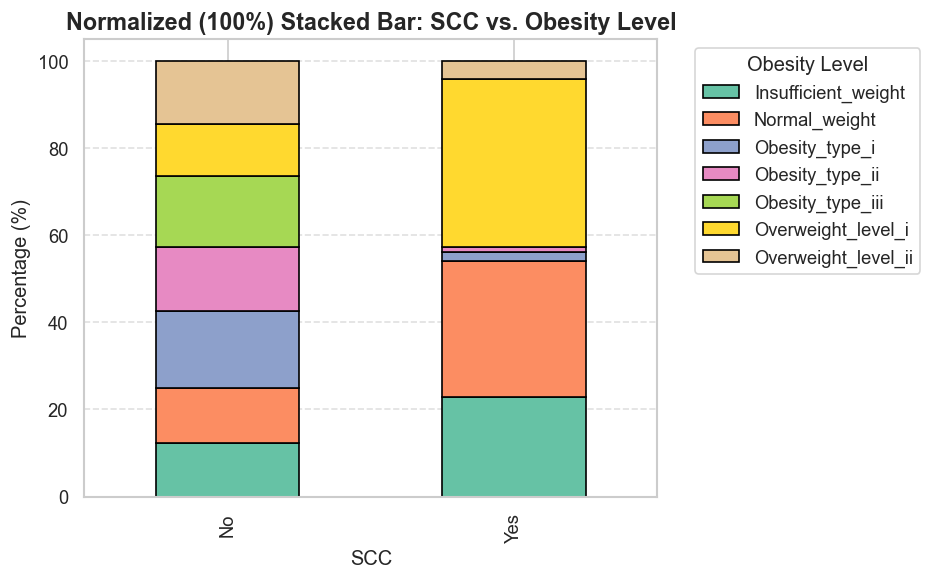

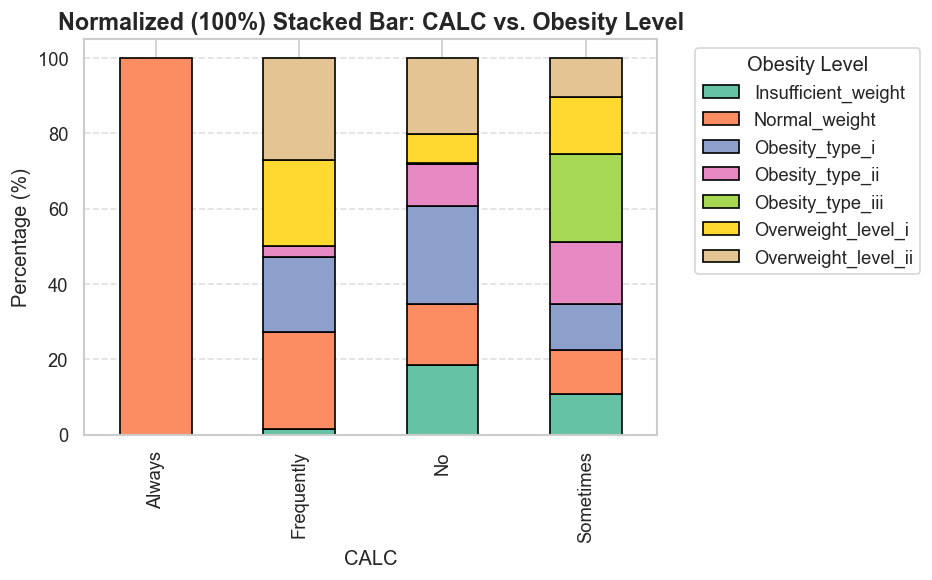

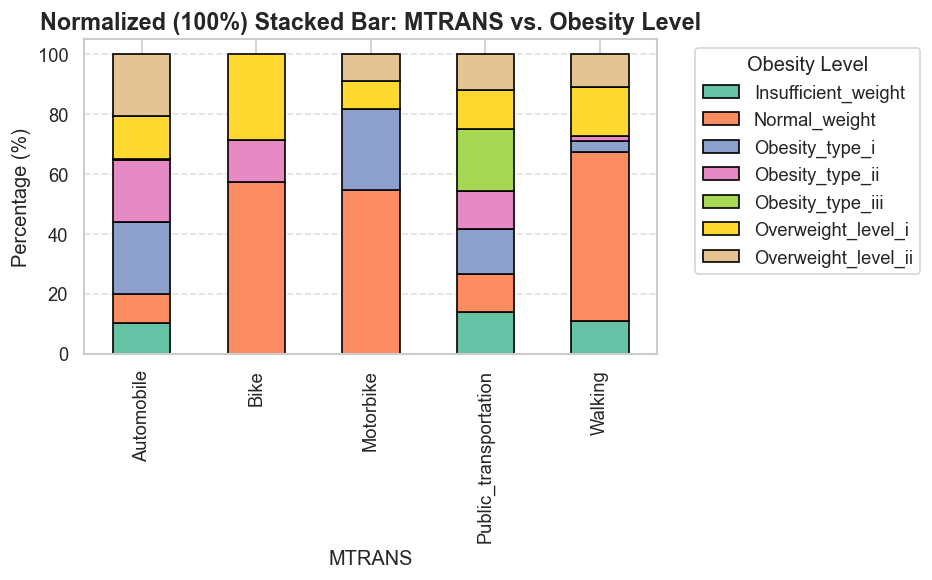

In [ ]:
#eXPERIMNTAL CODE BELOW FOR CATEGORICAL FEATURE VISUALIZATIONS
# List of all categorical features
categorical_features = [
    'Gender', 
    'family_history_with_overweight',
    'FAVC', 
    'CAEC', 
    'SMOKE', 
    'SCC', 
    'CALC', 
    'MTRANS'
]

# Consistent color palette (same order for all obesity levels)
obesity_order = sorted(data_clean['NObeyesdad'].unique())  # ensures same order
palette = sns.color_palette('Set2', len(obesity_order))

# --- Create normalized stacked bar chart for each categorical variable ---
for feature in categorical_features:
    # Create normalized (percentage) pivot table
    pivot_df = (data_clean.groupby(feature)['NObeyesdad']
                .value_counts(normalize=True)
                .unstack()
                .reindex(columns=obesity_order)
                .mul(100)
                .fillna(0))

    # Plot
    pivot_df.plot(
        kind='bar',
        stacked=True,
        figsize=(8, 5),
        color=palette,
        edgecolor='black'
    )

    plt.title(f'Normalized (100%) Stacked Bar: {feature} vs. Obesity Level', 
              fontsize=14, fontweight='bold')
    plt.xlabel(feature)
    plt.ylabel('Percentage (%)')
    plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


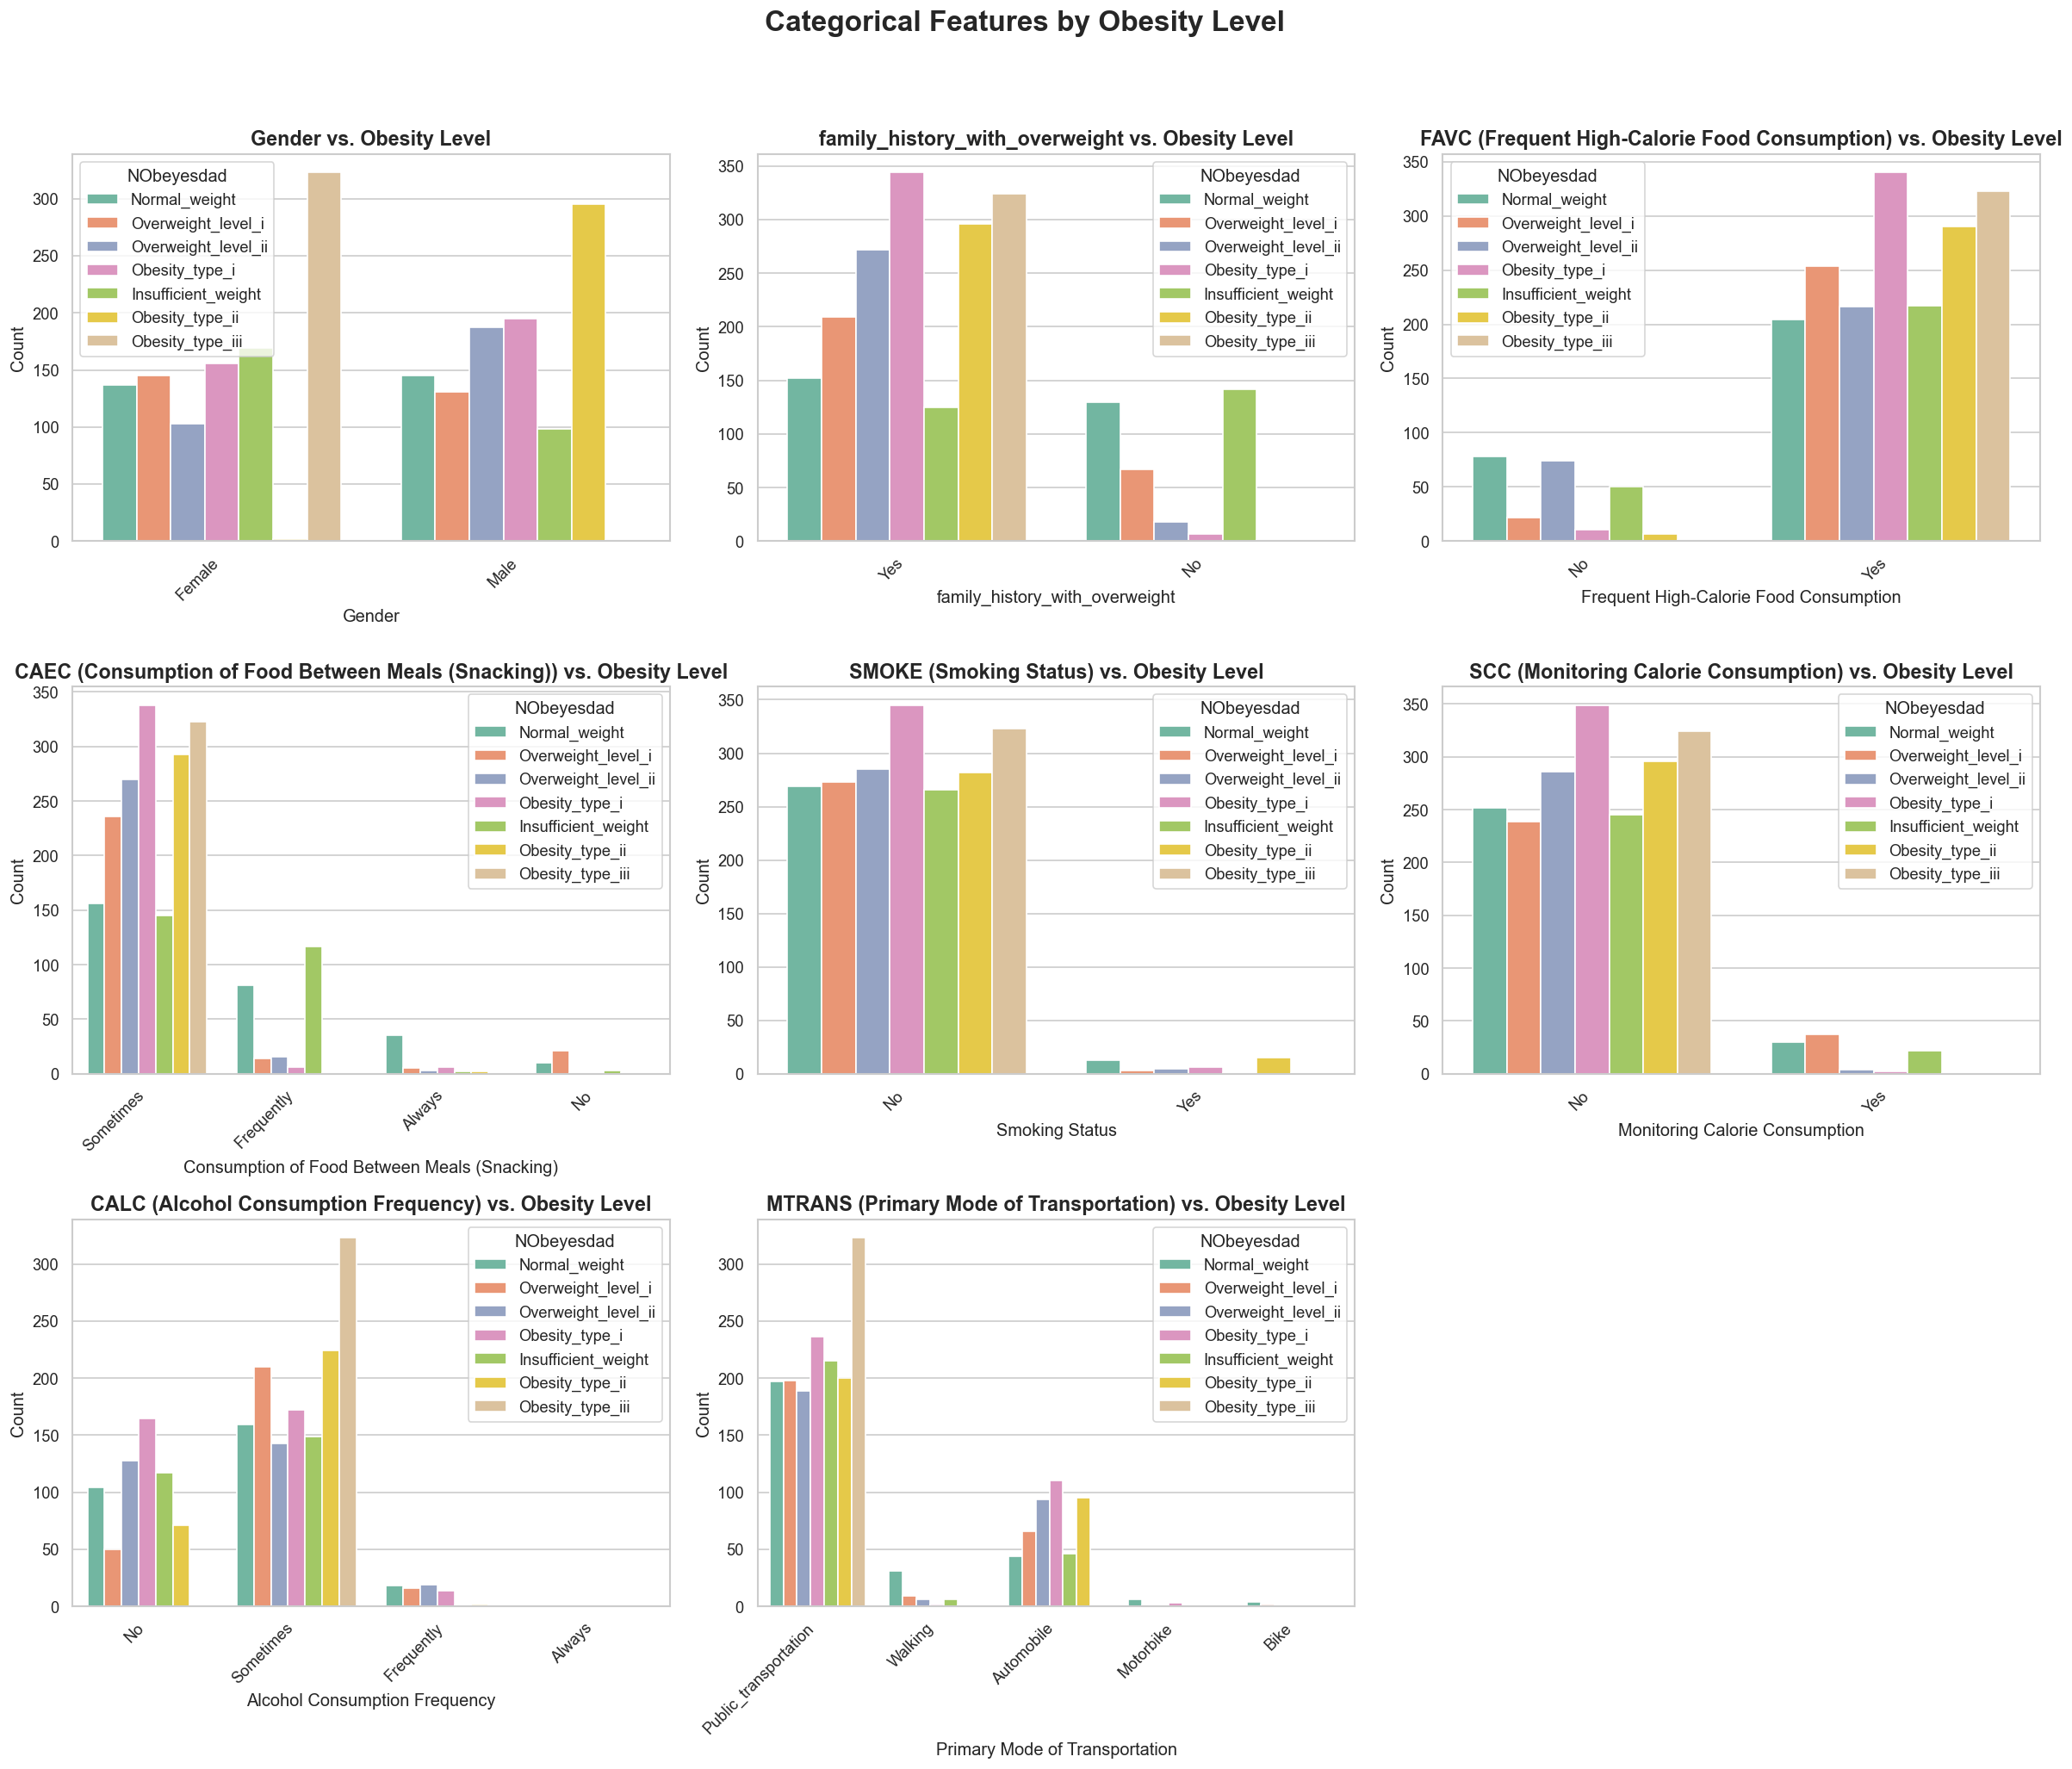

In [13]:
# --- Dictionary for Descriptive Titles ---
# This maps only the acronyms and coded variables to their clear, descriptive names.
feature_name_map = {
    'FAVC': 'Frequent High-Calorie Food Consumption',
    'CAEC': 'Consumption of Food Between Meals (Snacking)',
    'SMOKE': 'Smoking Status',
    'SCC': 'Monitoring Calorie Consumption',
    'CALC': 'Alcohol Consumption Frequency',
    'MTRANS': 'Primary Mode of Transportation'
}

# List of categorical features (all 8 included for visualization)
categorical_features = [
    'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
    'SMOKE', 'SCC', 'CALC', 'MTRANS'
]


# Create a grid of subplots (3 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 18))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Loop through each categorical feature to plot countplot
for i, feature in enumerate(categorical_features):
    # 1. Get the descriptive name. If not mapped (e.g., 'Gender'), returns the feature name.
    descriptive_name = feature_name_map.get(feature, feature)
    
    sns.countplot(
        x=feature,            # The categorical feature on the x-axis
        hue='NObeyesdad',       # The target variable (obesity level)
        data=data_clean,      # Your DataFrame
        ax=axes[i],           # Plot on corresponding subplot
    )
    
    # 2. Construct the title: code (meaning) or just the meaning.
    if feature in feature_name_map:
        # For mapped features (FAVC, MTRANS, etc.)
        title_label = f'{feature} ({descriptive_name})'
    else:
        # For non-mapped features (Gender, family_history_with_overweight)
        title_label = descriptive_name
        
    
    # Set the title using the new, detailed label
    axes[i].set_title(f'{title_label} vs. Obesity Level', fontsize=14, fontweight='bold')
    
    # Keep the X-label clean (using the descriptive name)
    axes[i].set_xlabel(descriptive_name) 
    
    axes[i].set_ylabel('Count')
    
    # Rotate x-axis labels for readability
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')
    
    # Optional: Simplify legend
    # axes[i].legend(loc='upper right', fontsize='small')

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Add a main title for the figure
plt.suptitle('Categorical Features by Obesity Level', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save figure
# plt.savefig("../visuals/graph3_categorical_features_distribution.png", bbox_inches='tight')

# Show the plot
plt.show()

Quantify categorical feature strength

In [27]:
# Function for Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1))/(n - 1))    
    rcorr = r - ((r - 1)**2)/(n - 1)
    kcorr = k - ((k - 1)**2)/(n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# List of your categorical variables
categorical_features = [
    'Gender', 
    'family_history_with_overweight',
    'SMOKE', 
    'FAVC',
    'SCC', 
    'CAEC', 
    'CALC', 
    'MTRANS'
]

# Calculate Cramér’s V for each
results = {}
for col in categorical_features:
    results[col] = cramers_v(data_clean[col], data_clean['NObeyesdad'])

# Create a summary table
cramers_results = pd.DataFrame.from_dict(results, orient='index', columns=['Cramers_V'])
cramers_results.sort_values(by='Cramers_V', ascending=False)



Cramers_V
Gender                           0.558835
family_history_with_overweight   0.541521
CAEC                             0.335882
FAVC                             0.328623
SCC                              0.241865
CALC                             0.225373
MTRANS                           0.178191
SMOKE                            0.111324

C:\Users\User\AppData\Local\Temp\ipykernel_5764\4209239163.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cramers_V', y=cramers_df.index, data=cramers_df, palette='crest')


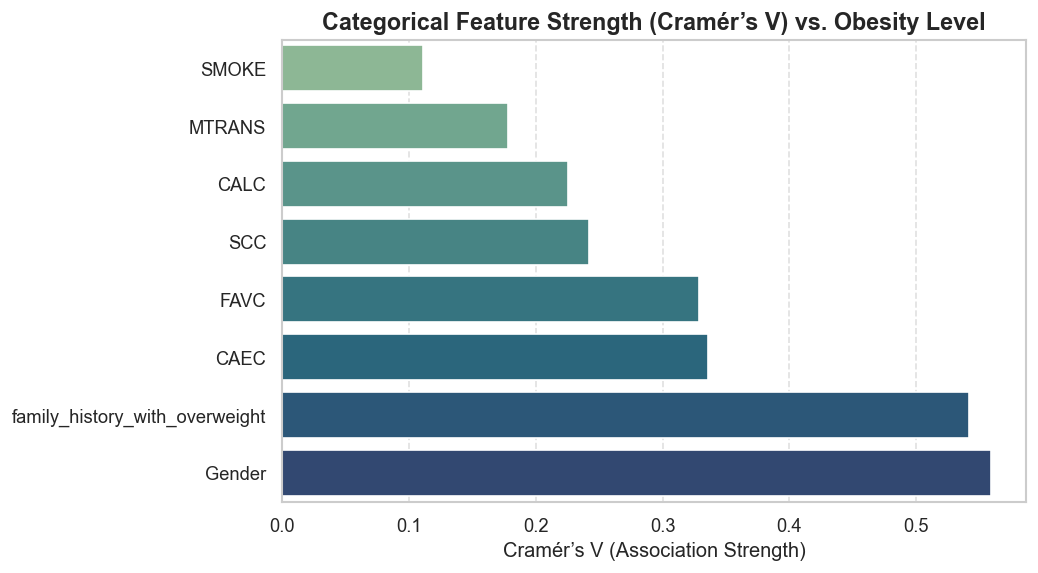

In [28]:

# Compute Cramér’s V 
results = {}
for col in categorical_features:
    results[col] = cramers_v(data_clean[col], data_clean['NObeyesdad'])

cramers_df = pd.DataFrame.from_dict(results, orient='index', columns=['Cramers_V']).sort_values('Cramers_V', ascending=True)

# --- Plot ---
plt.figure(figsize=(8,5))
sns.barplot(x='Cramers_V', y=cramers_df.index, data=cramers_df, palette='crest')
plt.title('Categorical Feature Strength (Cramér’s V) vs. Obesity Level', fontsize=14, fontweight='bold')
plt.xlabel('Cramér’s V (Association Strength)')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


Interpretation:

Bars near 0 → no relationship

Bars ≥ 0.3 → strong categorical relationship

### Step 4c: Chapter 3: Feature Distributions by Obesity Level.
*Graph 3: Boxplots of Numeric Features by Obesity Level*

C:\Users\User\AppData\Local\Temp\ipykernel_5764\759193158.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\User\AppData\Local\Temp\ipykernel_5764\759193158.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\User\AppData\Local\Temp\ipykernel_5764\759193158.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\User\AppData\Local\Temp\ipykernel_5764\759193158.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `leg

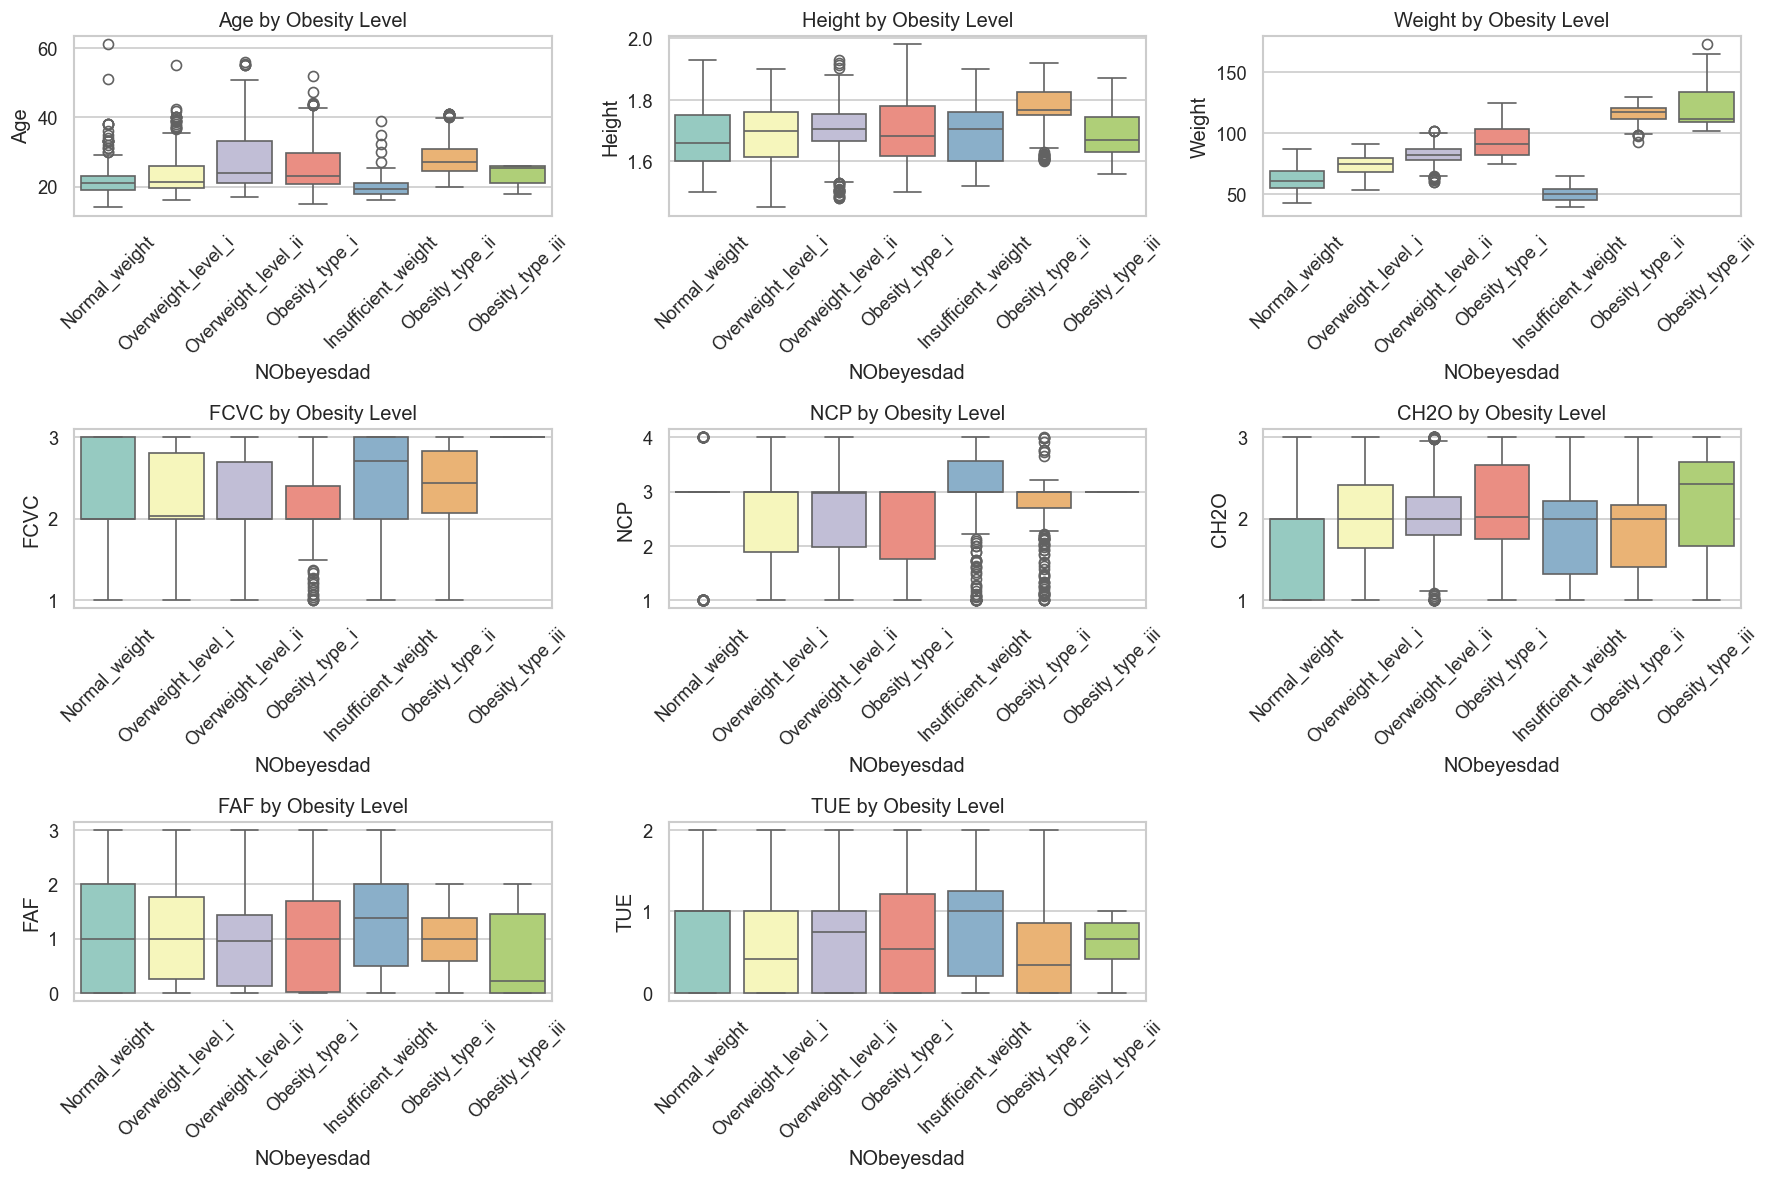

In [16]:
# Create boxplots of numeric features grouped by obesity level
plt.figure(figsize=(15,10))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3,3,i)   # Arrange subplots in a 3x3 grid
    sns.boxplot(
        x='NObeyesdad',  # Categorical target
        y=feature,        # Numeric feature
        data=data_clean,  
        palette='Set3'    # Accessible colors
    )
    plt.title(f"{feature} by Obesity Level")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("../visuals/graph3_boxplots_numeric_by_obesity.png", bbox_inches='tight')
plt.show()


Quantify numeric feature importance

In [29]:
from scipy.stats import f_oneway

numeric_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

anova_results = {}
for feature in numeric_features:
    groups = [group[feature].values for name, group in data_clean.groupby('NObeyesdad')]
    stat, p = f_oneway(*groups)
    anova_results[feature] = p

anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['p_value'])
anova_df['Significant'] = anova_df['p_value'] < 0.05
anova_df.sort_values(by='p_value')


p_value  Significant
Weight   0.000000e+00         True
FCVC    3.796507e-121         True
Age      3.246862e-86         True
Height   2.518501e-43         True
NCP      7.132002e-31         True
FAF      1.155420e-20         True
CH2O     4.297247e-17         True
TUE      1.772380e-08         True

Interpreting:

A small p-value (< 0.05) means the feature’s mean differs significantly across obesity levels → important predictor.

A large p-value (> 0.05) means it likely doesn’t vary much → less useful.

## Step 4d: Chapter 5: Feature Relationships 
Graph 4: Correlation Heatmap


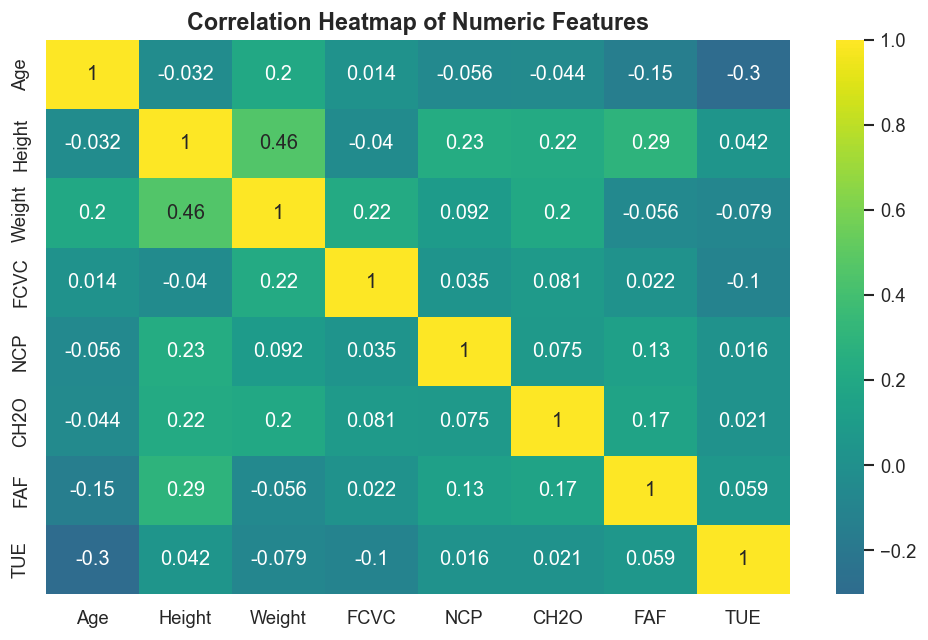

In [17]:
plt.figure(figsize=(10,6))

# Compute correlation matrix and plot heatmap
sns.heatmap(
    data_clean[numeric_features].corr(),  # Correlation matrix
    annot=True,                           # Show correlation values
    cmap='viridis',                      # Diverging color palette
    center=0                              # Center color at 0
)

plt.title("Correlation Heatmap of Numeric Features", fontsize=14, fontweight='bold')
plt.savefig("../visuals/graph4_correlation_heatmap.png", bbox_inches='tight')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_5764\1394198462.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Strength', y=anova_df.index, data=anova_df, palette='viridis')


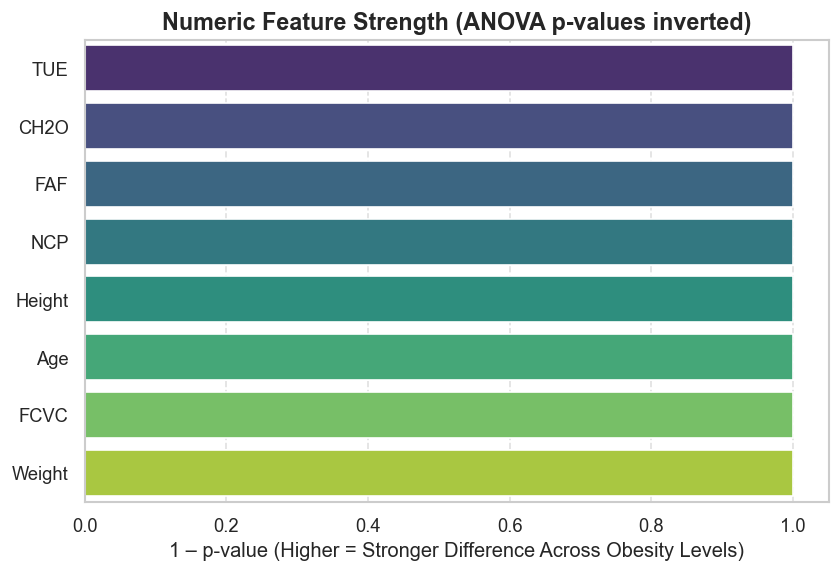

In [18]:
from scipy.stats import f_oneway

anova_results = {}
for feature in numeric_features:
    groups = [group[feature].values for _, group in data_clean.groupby('NObeyesdad')]
    stat, p = f_oneway(*groups)
    anova_results[feature] = p

anova_df = (pd.DataFrame.from_dict(anova_results, orient='index', columns=['p_value'])
            .sort_values('p_value', ascending=False))
anova_df['Strength'] = 1 - anova_df['p_value']   # so higher bar = stronger difference

# --- Plot ---
plt.figure(figsize=(8,5))
sns.barplot(x='Strength', y=anova_df.index, data=anova_df, palette='viridis')
plt.title('Numeric Feature Strength (ANOVA p-values inverted)', fontsize=14, fontweight='bold')
plt.xlabel('1 – p-value (Higher = Stronger Difference Across Obesity Levels)')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


### Step 4e: Chapter 5: Multivariate Relationships 
Graph 5: Pairplot of Selected Numeric Features

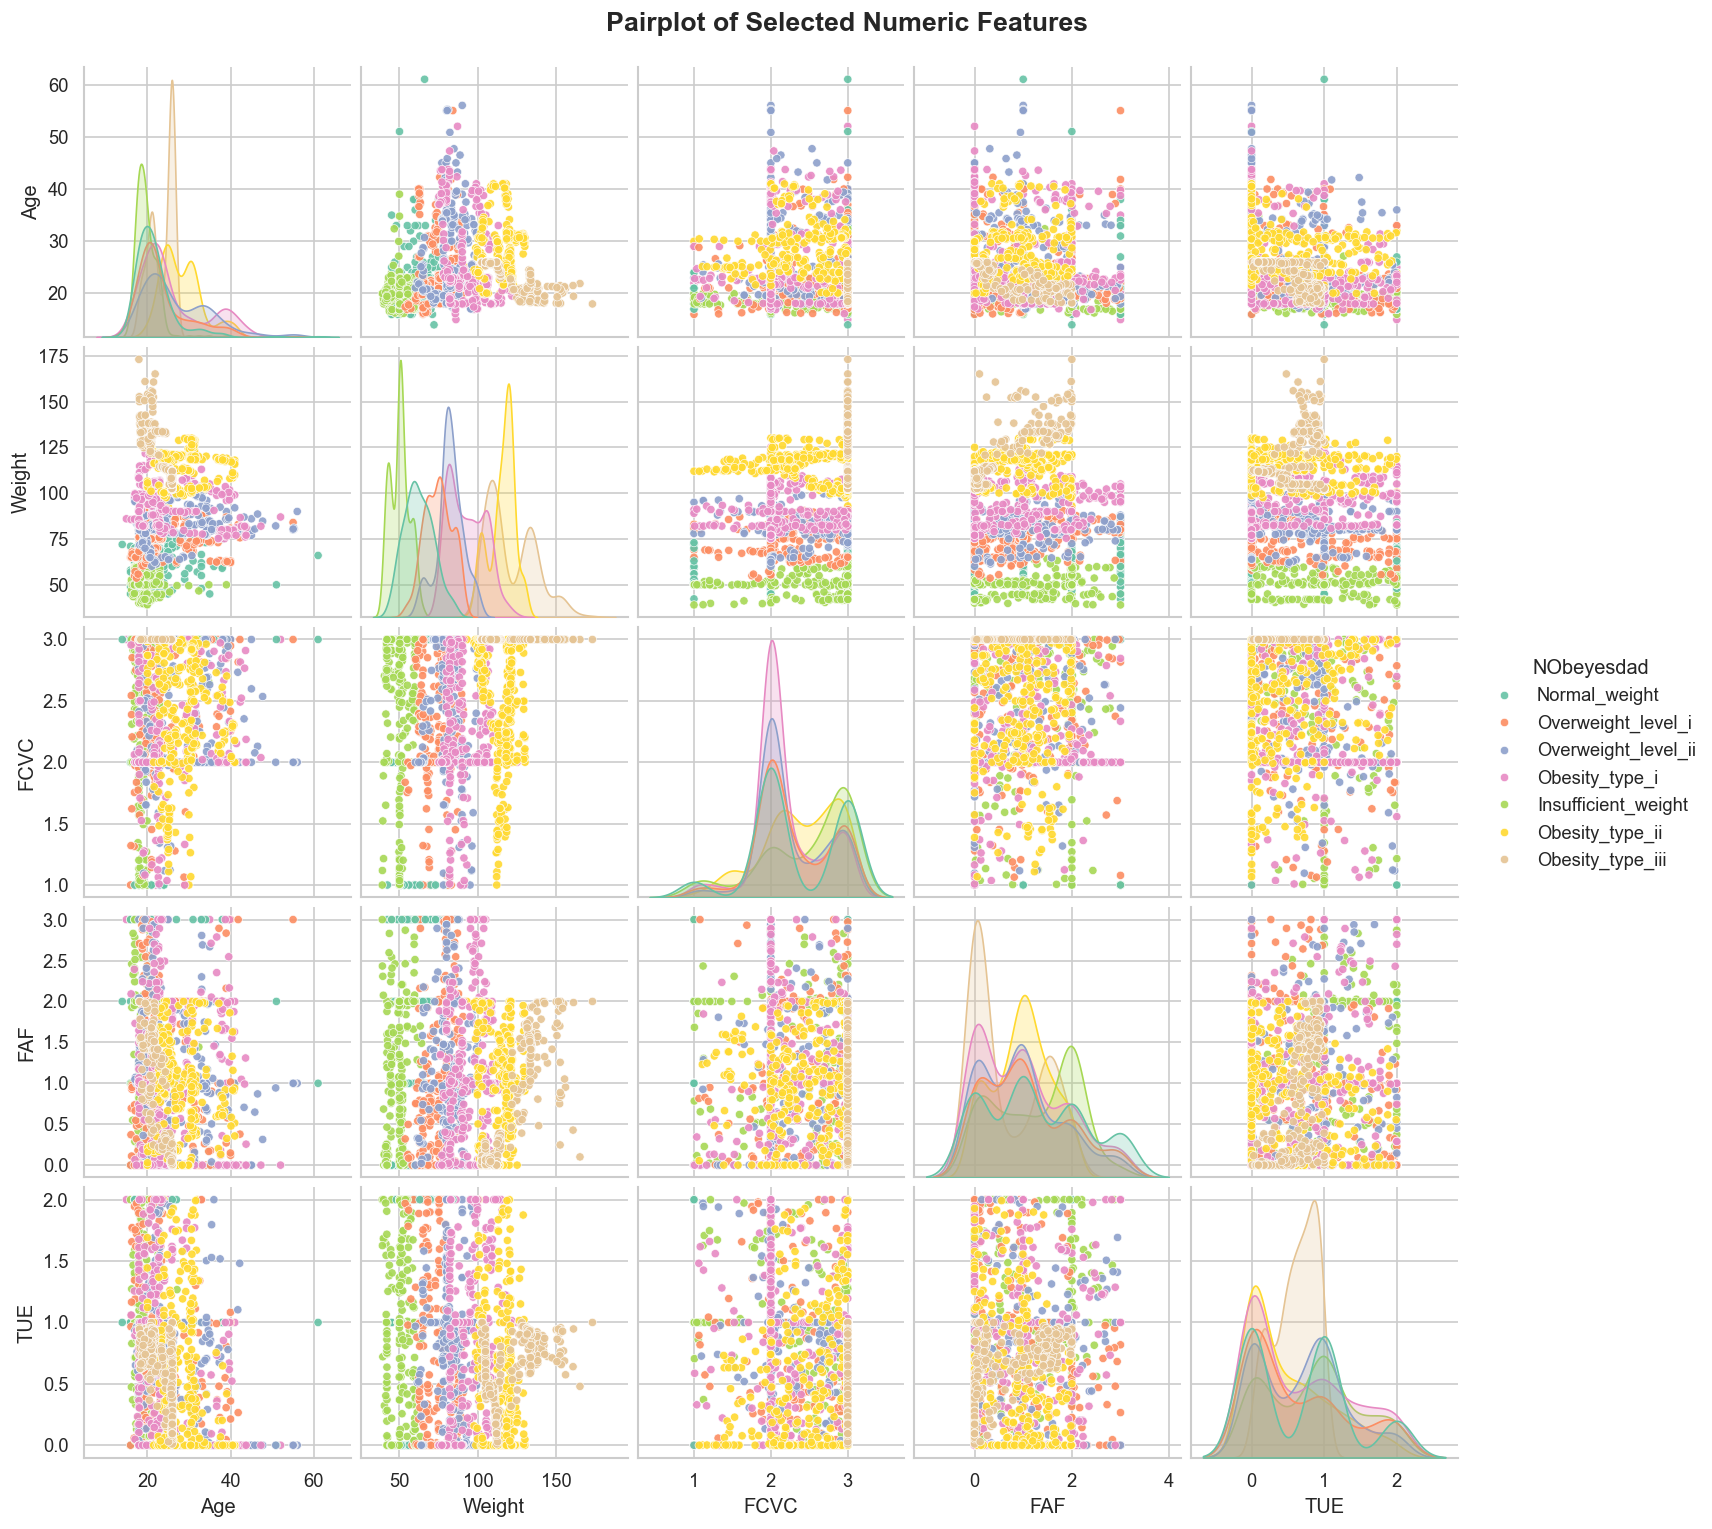

In [19]:
# Select numeric features for pairplot
selected_features = ['Age', 'Weight', 'FCVC', 'FAF', 'TUE']

# Pairplot with KDE on diagonals, colored by obesity level
sns.pairplot(
    data=data_clean[selected_features + ['NObeyesdad']],  # Include target variable
    hue='NObeyesdad', 
    palette='Set2', 
    diag_kind='kde', 
    plot_kws={'alpha':0.9, 's':25}  # Transparency and point size
)

plt.suptitle("Pairplot of Selected Numeric Features", fontsize=16, fontweight='bold', y=1.02)
plt.savefig("../visuals/graph5_pairplot_selected_features.png", bbox_inches='tight')
plt.show()


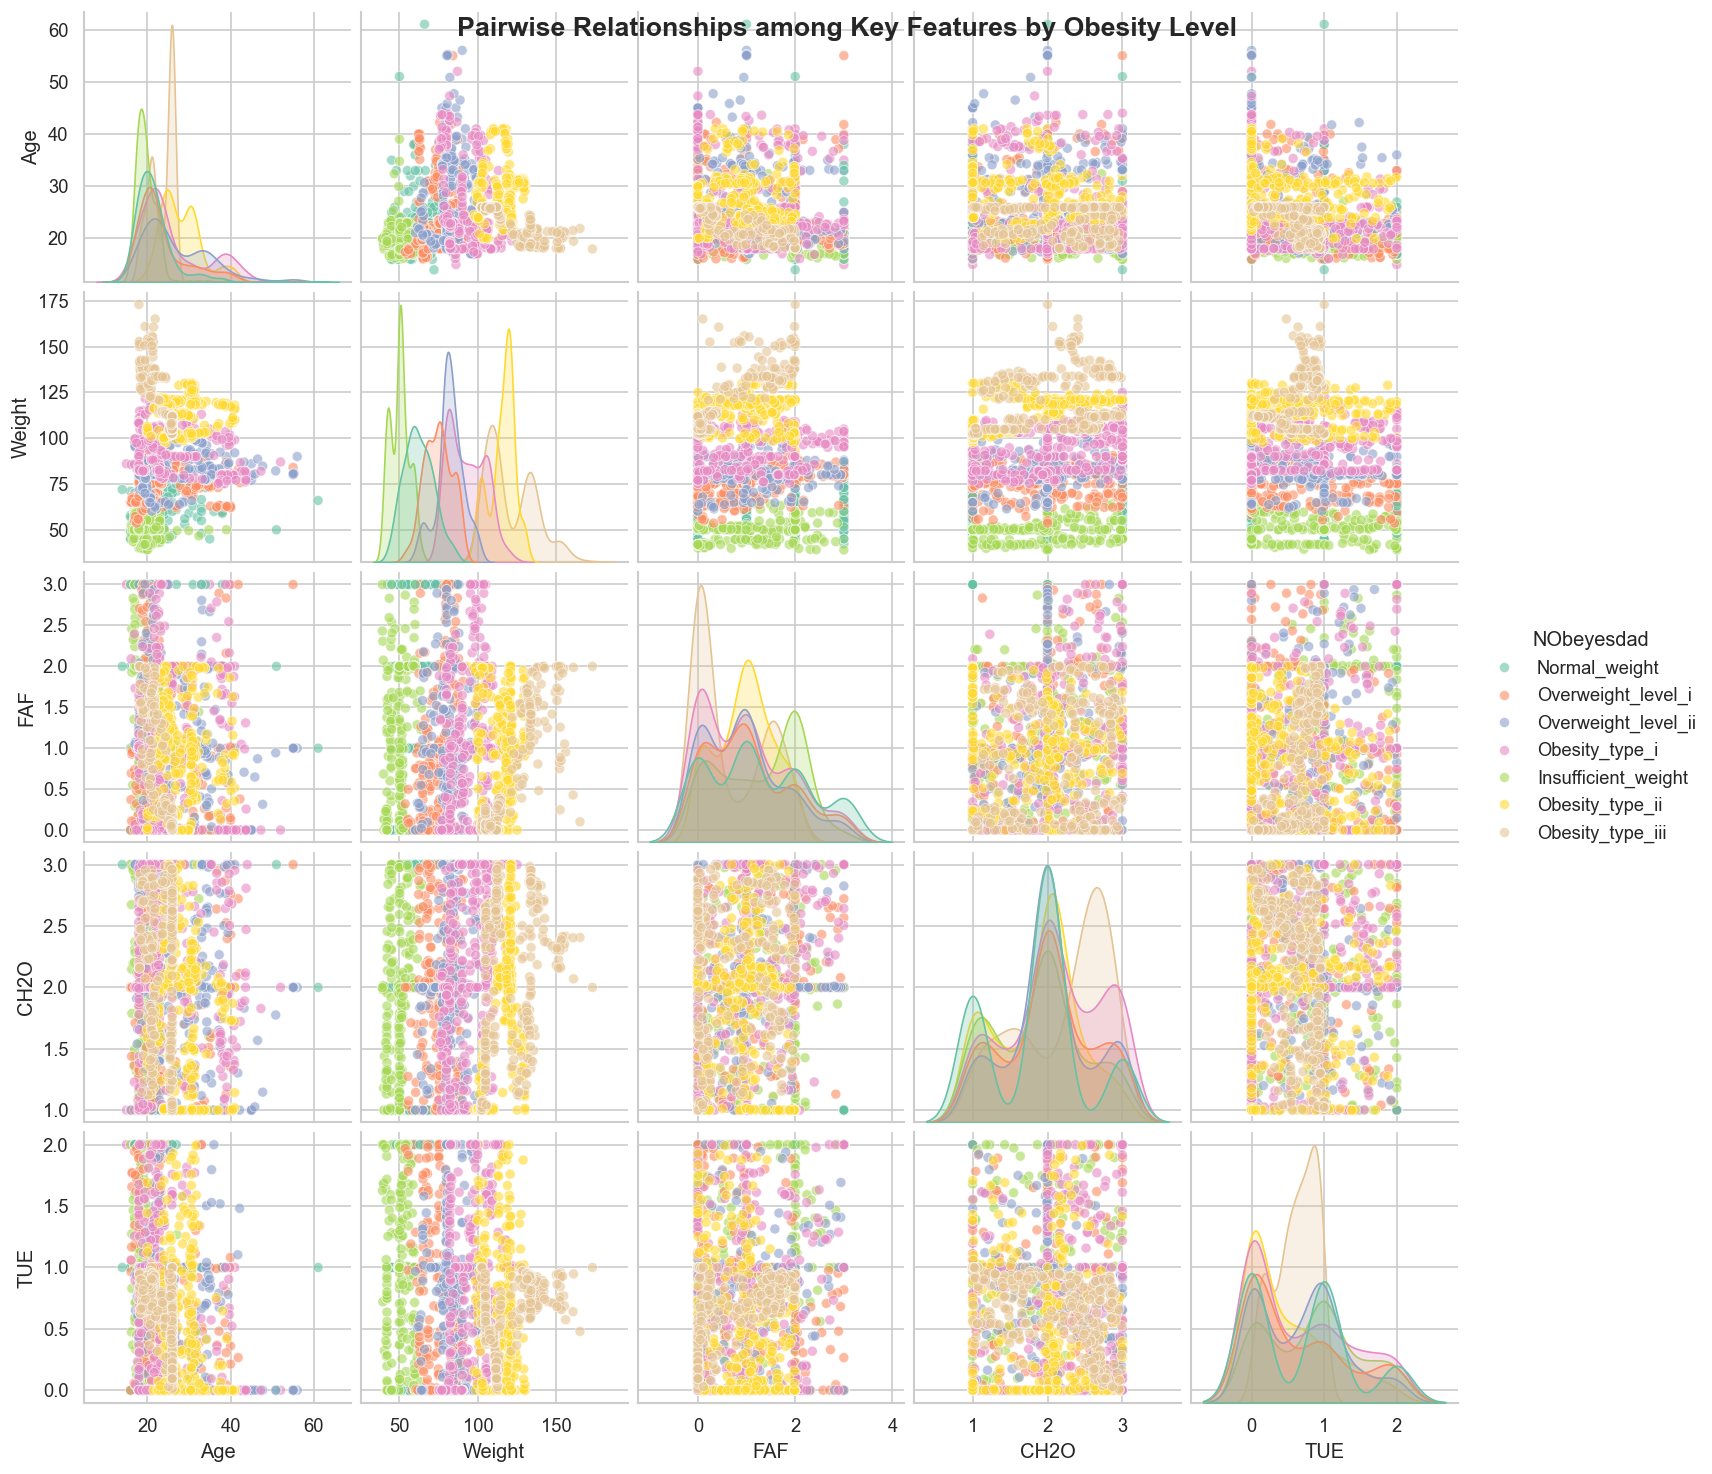

In [20]:
selected_features = ['Age', 'Weight', 'FAF', 'CH2O', 'TUE', 'NObeyesdad']

sns.pairplot(
    data=data_clean[selected_features],
    hue='NObeyesdad',
    palette='Set2',
    diag_kind='kde',
    plot_kws={'alpha': 0.6}
)
plt.suptitle('Pairwise Relationships among Key Features by Obesity Level', fontsize=16, fontweight='bold')
plt.show()


* Interpretation / Data Story:

   * Confirms strongest patterns: weight and activity are primary differentiators.
   * FCVC shows minor influence.
   * Multivariate relationships and potential clusters are visible.

Why this chart: Pairplots visualize bivariate relationships and highlight trends or clusters across multiple features.

### Next Steps / Potential Future Work:

1. **Feature Engineering:**  
   - Create composite indices (e.g., a "Sedentary Score" combining FAF and TUE).  

2. **Predictive Modeling:**  
   - Use EDA insights to train classifiers (Random Forest, XGBoost, Logistic Regression) to predict `NObeyesdad` category.  

3. **Model Interpretation:**  
   - Assess feature importance to quantitatively validate behavioral and demographic drivers.  

4. **Further EDA / Visualization:**  
   - Explore categorical variables (e.g., smoking, alcohol habits, transportation methods) vs obesity levels.  
   - Investigate potential clusters among lifestyle or demographic groups.  

5. **Actionable Narrative:**  
   - Highlight which lifestyle and demographic factors most influence obesity.  
   - Inform interventions focusing on **increasing activity**, **reducing screen time**, and targeting **high-risk demographics**.


### Example: Preparing the Dataset for Modeling (Feature / Target Separation)

Here is an example of how you can start working on this dataset by preparing it for **predictive modeling**.  
This step separates the **features (X)** and the **target (y)**, which is a standard process before training classification models.


In [21]:
# Features: all columns except the target variable
X = data_csv.drop(columns=['NObeyesdad'])

# Target: obesity level category
y = data_csv['NObeyesdad']

# Quick preview of features and target
print("\nPreview of features (X):")
print (X.head())

print("\nPreview of target (y):")
print (y.head())


# Notes:

# X contains all predictive features (demographics, lifestyle habits, numeric and categorical variables).

# y contains the target variable, NObeyesdad, representing obesity levels.

# This separation is standard for supervised learning tasks.


Preview of features (X):
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            Yes   No   2.0   
1  Female  21.0    1.52    56.0                            Yes   No   3.0   
2    Male  23.0    1.80    77.0                            Yes   No   2.0   
3    Male  27.0    1.80    87.0                             No   No   3.0   
4    Male  22.0    1.78    89.8                             No   No   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    No   2.0   No  0.0  1.0          No   
1  3.0  Sometimes   Yes   3.0  Yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    No   2.0   No  2.0  1.0  Frequently   
3  3.0  Sometimes    No   2.0   No  2.0  0.0  Frequently   
4  1.0  Sometimes    No   2.0   No  0.0  0.0   Sometimes   

                  MTRANS  
0  Public_transportation  
1  Public_transportation  
2  Public_transportation  
3                Walking  
4  Public_trans